In [1]:
# This Line of Code is used to connect our google colab to our google drive where we must place our dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This line is used to unzip the dataset
!unzip "drive/MyDrive/Traffic signs/archive (12).zip" -d "drive/MyDrive/Traffic signs"

Archive:  drive/MyDrive/Traffic signs/archive (12).zip
replace drive/MyDrive/Traffic signs/signname.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drive/MyDrive/Traffic signs/signname.csv  
  inflating: drive/MyDrive/Traffic signs/test.p  
  inflating: drive/MyDrive/Traffic signs/train.p  
  inflating: drive/MyDrive/Traffic signs/valid.p  


In [3]:
# Importing the necessary Libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

#PHASE 1 Data Loading and Preprocessing


In [4]:
#PHASE 1 Data Loading and Preprocessing
# The image was saved as a pickle file and as a result we will be using the pickle library to load out this data
# The dataset is divided into three categories the train.p, the valid.p and the test.p for training, validation and testing respectively
# Below we define the file paths (make sure your notebook is in the same folder or update paths)
training_file = 'drive/MyDrive/Traffic signs/train.p'
validation_file = 'drive/MyDrive/Traffic signs/valid.p'
testing_file = 'drive/MyDrive/Traffic signs/test.p'

# Load the training data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)

# Load validation and testing data
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Usually, these pickle files are dictionaries.
# Let's extract the features (X) and labels (y).
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Check the shapes to confirm
print("X_train shape:", X_train.shape) # Should be (num_samples, height, width, channels) like (n_samples, 32, 32, 3) usually
print("y_train shape:", y_train.shape) # Should be (n_samples,)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)


In [5]:
# Normalize the training, validation, and testing sets
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
# Load the csv file containing the traffic signs and their IDs
sign_names = pd.read_csv('drive/MyDrive/Traffic signs/signname.csv')
print(sign_names.head())

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


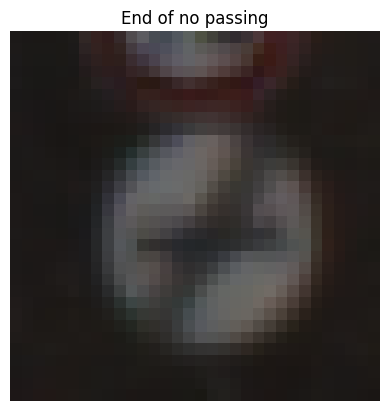

In [7]:
# Create a dictionary for label to sign name so that each sign has it own label and so it will be easier for us when we want to visualize the images
# label_map is the name of our dictionary, dict is the keyword we use when creating a dictionary, zip is used to pair the first item, ClassId, with its corresponding second item,SignName

label_map = dict(zip(sign_names['ClassId'], sign_names['SignName']))

# Pick one image
image = X_train[0]
label = y_train[0]

# imshow is a module from matplotlib used to show images.
# plt.axis('off') → hides the x/y axes so the image looks cleaner.
plt.imshow(image)
plt.title(label_map[label])
plt.axis('off')
plt.show()

# PHASE 2 Model Building

In [8]:
# PHASE 2 Model Building
number_of_classes = len(sign_names)

model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Second Convolutional Block
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    #Third Convolutional Block
    layers.Conv2D(128,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(number_of_classes, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

print("Model defined and compiled successfully.")

Model defined and compiled successfully.


# PHASE 3 Model Training

In [9]:
# PHASE 3 Model Training
# Define training hyperparameters which are the epochs and the batch_size
# epochs are the number of times the entire training dataset is passed through the model during training.
# batch_size controls the number of images the model sees at a time before updating it's weight
epochs = 20
batch_size = 32

In [10]:
# Train the model using training data and validate using validation data
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.2481 - loss: 2.7438 - val_accuracy: 0.7977 - val_loss: 0.7662
Epoch 2/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - accuracy: 0.7457 - loss: 0.7839 - val_accuracy: 0.9009 - val_loss: 0.3986
Epoch 3/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.8605 - loss: 0.4192 - val_accuracy: 0.9288 - val_loss: 0.2873
Epoch 4/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.8986 - loss: 0.3023 - val_accuracy: 0.9340 - val_loss: 0.2556
Epoch 5/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9206 - loss: 0.2323 - val_accuracy: 0.9503 - val_loss: 0.2559
Epoch 6/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9334 - loss: 0.1915 - val_accuracy: 0.9596 - val_loss: 0.1571
Epoch 7/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.9452 - loss: 0.1601 - val_accuracy: 0.9499 - val_loss: 0.2015
Epoch 8/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9589 -

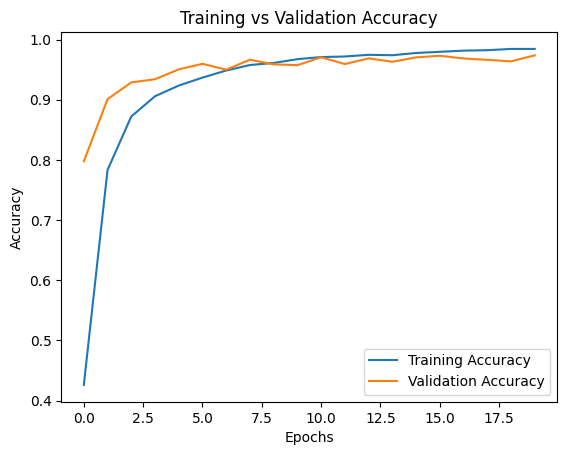

In [11]:
# Training visualization
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()

# Phase 4 Model Evaluation and Tuning

In [12]:
# Phase 4 Model Evaluation and Tuning
# Here we Evaluate the Model on the validation data
val_loss, val_accuracy = model.evaluate(X_valid, y_valid, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Loss: 0.1389
Validation Accuracy: 0.9737


138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


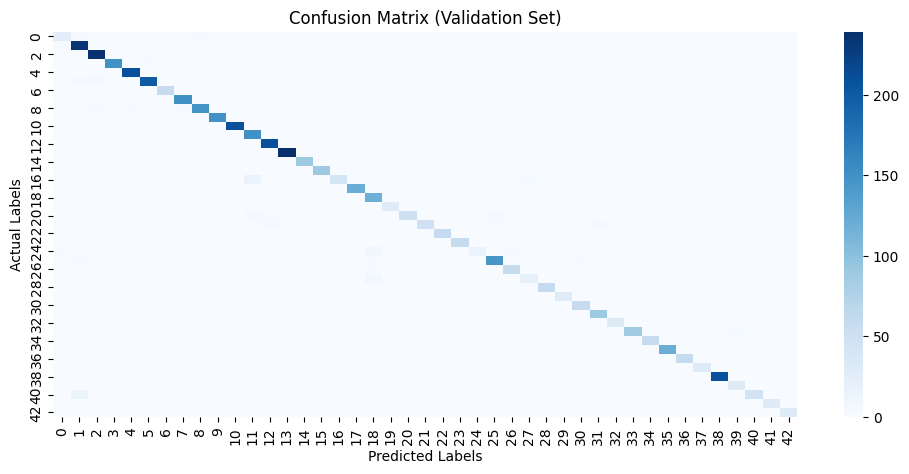

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get Predictions from the validation set to see how well it's performing so far
y_pred_valid = model.predict(X_valid)
y_pred_valid_classes = np.argmax(y_pred_valid, axis=1)

# Confusion Matrix for the validation set
cm = confusion_matrix(y_valid, y_pred_valid_classes)

plt.figure(figsize=(12, 5))
sns.heatmap(cm, cmap="Blues", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix (Validation Set)")
plt.show()

In [14]:
print(f"The model achieved an optimal accuracy of {val_accuracy:.4f} and since standard practices were followed further tuning could lead to overfitting hence we will use this model as it is and proceed to the test set evaluation")

The model achieved an optimal accuracy of 0.9737 and since standard practices were followed further tuning could lead to overfitting hence we will use this model as it is and proceed to the test set evaluation


# Phase 5: Test Evaluations

In [15]:
# Phase 5: Test Evaluations
# This is the final evaluation on unseen test data
from sklearn.metrics import classification_report, accuracy_score
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Lost: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Lost: 0.2195
Test Accuracy: 0.9632


In [16]:
# Getting predictions on the test sets and their classification reports
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
target_names = [label_map[i] for i in range(number_of_classes)]
print(classification_report(y_test, y_pred_test_classes, target_names=target_names))

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
                                               precision    recall  f1-score   support

                         Speed limit (20km/h)       1.00      1.00      1.00        60
                         Speed limit (30km/h)       0.96      1.00      0.98       720
                         Speed limit (50km/h)       0.97      0.99      0.98       750
                         Speed limit (60km/h)       0.95      0.94      0.95       450
                         Speed limit (70km/h)       0.99      0.98      0.99       660
                         Speed limit (80km/h)       0.90      0.94      0.92       630
                  End of speed limit (80km/h)       0.98      0.81      0.88       150
                        Speed limit (100km/h)       0.97      0.97      0.97       450
                        Speed limit (120km/h)       0.98      0.93      0.96       450
                                   No passing       0.96      1.00      0.98       480


In [ ]:
# Confusion Matrix for the test set
cm_test = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(15, 12))
sns.heatmap(cm_test, annot=True, cmap="Greens", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Final Confusion Matrix (Test Set)")
plt.show()

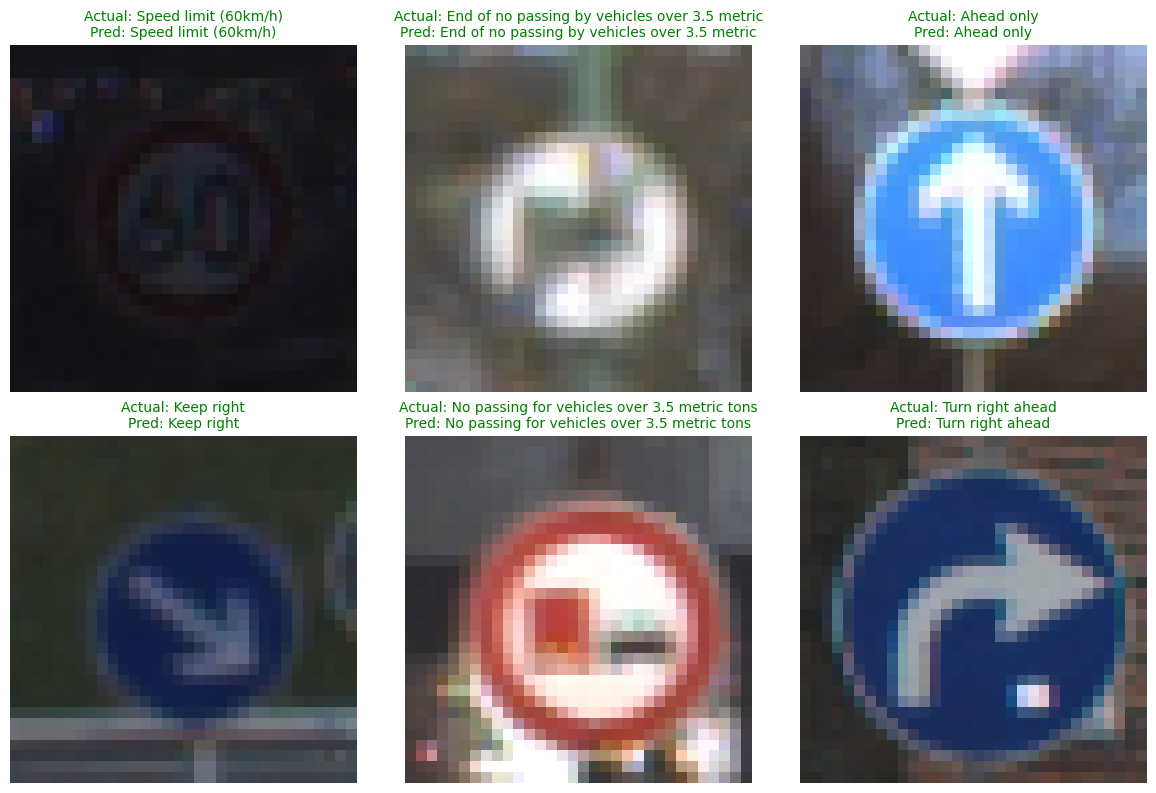

In [27]:
#Visualize Some Random Test Predictions To Check if it is predicting accurately
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    # Pick a random image from the test set
    random_index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[random_index])

    actual = label_map[y_test[random_index]]
    predicted = label_map[y_pred_test_classes[random_index]]

    color = 'green' if actual == predicted else 'red'
    plt.title(f"Actual: {actual}\nPred: {predicted}", color=color, fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Saving the Final Model
model.save("my_model.keras")
print(f"Model saved successfully")

In [ ]:
# Loading the model and using it to make prediction on an image  from the test set
from tensorflow.keras.models import load_model
loaded_model = load_model("my_model.keras")

#Pick a single image from the test set (e.g., index 100)
test_index = 200
input_image = X_test[test_index]
true_label = y_test[test_index]
img_to_predict = np.expand_dims(input_image, axis=0)

# Make the Prediction
prediction = loaded_model.predict(img_to_predict)
predicted_class = np.argmax(prediction)

# Get readable names
actual_name = label_map[true_label]
predicted_name = label_map[predicted_class]

# Display image and result
plt.figure(figsize=(4,4))
plt.imshow(input_image)
plt.title(f"Actual: {actual_name}\nPredicted: {predicted_name}",
          color="green" if actual_name == predicted_name else "red")
plt.axis("off")
plt.show()

In [21]:
# Now there's a sample image gotten from the internet, and it was saved in the /content directory of the Colab environment
# This image was brought to test our model on a sign that is neither from the train, validation or test sets to see if it will give an accurate result
# First we try to access the files and folders inside the /content directory of the Colab environment
!ls /content


 drive	 my_model.keras   sample_data  'Screenshot 2025-12-31 125750.png'


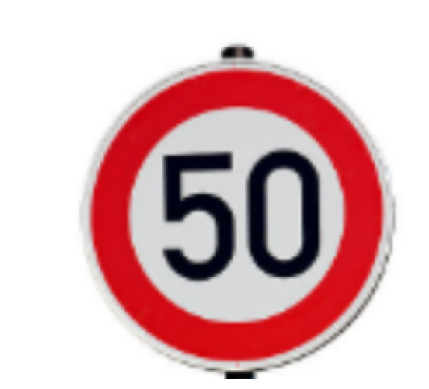

In [22]:
# Here we Load the image and convert its color format to RGB using the openCV library
# The OpenCv Library (cv2) is used for Computer vision tasks like image processing and analysis
import cv2
image_path = "/content/Screenshot 2025-12-31 125750.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()

In [23]:
# # Resize, normalize, and prepare the image for our model to use

img_resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
img_normalized = img_resized.astype("float32") / 255.0
img_input = np.expand_dims(img_normalized, axis=0)


In [24]:
# Predict what class this image falls under
predictions = model.predict(img_input)
predicted_class = np.argmax(predictions)
confidence = np.max(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [25]:
print("Predicted class ID:", predicted_class)
print("Predicted sign:", label_map[predicted_class])
print("Confidence:", round(confidence * 100, 2), "%")


Predicted class ID: 2
Predicted sign: Speed limit (50km/h)
Confidence: 100.0 %


In [28]:
from google.colab import files
files.download("my_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
print("The Model has been downloaded")

The Model has been downloaded
